In [1]:
import os
import sys
import re
import string
import datetime
import time
import numpy as np
import matplotlib as mptl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from numpy import *
from datetime import timedelta
from datetime import datetime
from matplotlib.pyplot import grid, figure, plot, savefig
from time import gmtime, strftime
import pandas as pd
import math
from pykalman import KalmanFilter
#END OF HEADER

In [2]:
# net probelov v imenah SVS
timeArr=[]
arrF=[]
arrS=[]
arrSvs=[]
test=[]
count_time_svs = 0
filename =   os.path.basename('TPKL1681.22O')
#filename =   os.path.basename('POLY0502a.20o')#  L1    L2    C1    P1    P2    S1    S2
#filename =   os.path.basename('POLY0503a.20o')#  L1    L2    C1    P1    P2    S1    S2
#filename =   os.path.basename('POLY0501a.20o')#  L1    L2    C1    P1    P2    S1    S2
#filename =   os.path.basename('POLY0501a.20o')#  L1    L2    C1    P1    P2    S1    S2


#print(filename1)
file1 = open (filename)
allLines = file1.readlines()
file1linecount = len(allLines)
file1.seek(0) # peremestit ukozatel v nachal

for ln in range(file1linecount) :#3700 strok все строки
    # read equivalent lines from 2 or 3 files, at index ln (line number); 0 base
    line  = file1.readline()
    #print(line)
    #line  = file1.readline()
   
    #re.findall(r'G..|R..', param)END OF HEADER
    #\s\d\d\s\s\d\s\s\d\s...........
  
    if ln==14:
        times = (line[4:24])
        #print(times)# 20     5     1     0
        times=times.replace("    ", " ")
        times=times.replace("   ", " ")
        times=times.replace("  ", " ")
        times = times.replace(" ", " ")
        times=times.strip()
        times= times.split(" ")
        #print(times)
        timeArr = times
    if ln >= 24 :
        param=line.strip() #str
        
       # print(ln , line)
#        print('-------------------------')

        #print(paramtimeSvs = np.array(timeSvs,dtype=object))
    #    r = re.split(r'G', line)
        #print(ln , param)                        #G28G17G12G24G 6G 2
        result = re.findall(r'G..|R..', param)# ищим G любые симв и R люб символы        # type list
        vremya = re.findall(r'\d\d\s\s\d\s\s\d\s.', param)# ищим G любые симв и R люб символы        # type list
    
        if vremya :
            #print(ln , vremya)
            count_time_svs += 1
            
       

        if result :  #
            #result = re.sub('\s', '', result)# est probeli 
            #print(ln , result)
            arrSvs.append(result)
            #[['G16', 'G23', 'G06', 'G09', 'G04', 'G22', 'G03', 'G26', 'G14', 'G31'], 
            #['G16', 'G02]]
           
        else:
            #109723767.5854 8  85499045.2474 7    109723767.58548  85499045.24747      type STR
            res = re.sub('\s\w\s', '*', param)#zamena otshipaih jstatkov na 7
            #res = re.sub(';\w','7',res)
            res=res.replace(' ',"_")
            res = re.sub('\d_\d', '7' , res)# rab
            res=res.replace('*','____')
            #res=res.replace(';\w ',"")
            #print(param)
            #print(ln , ' ',res)
            #res=res.replace(';;;;;;;;;;;;;;;;;;',';NaN;')
            res=res.replace('________','_')
            res=res.replace('_____','_')
            res=res.replace('____','_')
            res=res.replace('__','_')
            res=res.replace('__','_')
            #print(res)
            #print(ln , ' ',res)
            res= res.split("_")  #          Type list
            #print(ln , ' ',res)
            #param = list(map(float, param))
            #print(ln)
            
            #arrSvs.append(result)
            test.append(res)    # Скидывает все данные где нет имен спутников
#print(len(test))          
#len(arrSvs) 
#print(count_time_svs)
#test

In [3]:
#print(len(arrSvs))
#print(len(test))
print(test)
voln=[]
voln2=[]
SVS=[]
#Во всех данных test нечетные строки 5 парам и четные 2 парам
for x in range(len(test)):# chetni stroki popadat 5 parametrov(L1,L2,C,P2) eshe 2 poslednie 2 parametra s1 s2 signal shum
    if x%2==0:
    #print(test[x])
        voln.append(test[x])
    elif x%2!=0:
        voln2.append(test[x])
#(voln)

[['23280513.602', '122339926.709', '3069.229', '41.564', '23280528.757'], ['95329881.663', '2391.949', '44.741'], ['20484645.262', '107647564.724', '-1037.898', '50.180', '20484654.267'], ['83881235.201', '-808.752', '44.741'], ['22159002.762', '116446364.986', '-2788.953', '46.294', '22159014.557'], ['90737449.971', '-2172.990', '44.741'], ['22736303.113', '119480088.869', '1941.084', '46.377', '22736311.327'], ['93101400.881', '1512.496', '38.601'], ['21171797.855', '111258572.227', '1557.217', '49.177', '21171808.347'], ['86695019.163', '1213.375', '44.741'], ['22838777.820', '120018592.753', '3286.787', '42.751', '22838788.517'], ['93521016.866', '2561.188', '44.741'], ['22754476.789', '119575585.464', '678.662', '45.031', '22754487.277'], ['93175810.025', '528.551', '39.553'], ['20410065.895', '107255655.391', '657.393', '53.189'], ['0.000', '0.000', '0.000'], ['23263016.469', '122247979.742', '3060.971', '41.656', '23263030.777'], ['95258234.743', '2384.820', '44.741'], ['2049061

In [4]:
cntt =0
for i in range(len(arrSvs)):
    for ii in range(len(arrSvs[i])):
        cntt +=1
        #print(arrSvs[i][ii])
cntt

2495

In [5]:
epoch=[]
t=0
##arrSvs ==[['G16', 'G23', 'G6', 'G9', 'G4', 'G22', 'G3', 'G26', 'G14', 'G31'], ['G16', 'G2....]]
for i in range(len(arrSvs)):#  SVS epoch columns
    #print(arrSvs[i])
    for ii in range(len(arrSvs[i])):
                                                                       # Probel v Nazvani SVS GLONas
        arrSvs[i][ii] = re.sub('\s', '', arrSvs[i][ii])# udalit probel probel G 1   G1  G 4  G4(krivo nazvani sputniki)
        #print(arrSvs[i][ii])
        SVS.append(arrSvs[i][ii])
        epoch.append(t) # massiv po 30 sec
        #SVS.append(arrSvs[i])
    t+=30         # ispolzuem vsegda v priemnike mogno brat s faila
    
#print(len(epoch))
#len(epoch)
#(epoch)

In [6]:
#arrF = np.array(voln,dtype=object)
arrS = np.array(SVS,dtype=object)
c_cons = 3e+5      # skorost sveta
#c_cons = 299792458
#
#arrFS = np.array(voln2,dtype=object)
df = pd.DataFrame(voln, columns=['C1', 'L1', 'D1', 'S1', 'P2'])# 'C1', 'L1', 'D1', 'S1', 'P2', 'L2', 'D2', 'S2'
df2 = pd.DataFrame(voln2, columns=['L2', 'D2', 'S2'])

##df_join = df.join(df2, rsuffix='_right') 
##df_join
df_all = df.join(df2)# объединяем два датафрэйма
df_all
df_all.insert(loc=0, column="svs", value=arrS)
df_all.insert(loc=1, column="epoch", value=epoch)
df_all = df_all.astype({'C1':'float','L1':'float','D1':'float','S1':'float','P2':'float','L2':'float','D2':'float','S2':'float'})
#df = df.astype({'L1':'float','L2':'float','C1':'float','P1':'float','P2':'float'})
df_all['epoch_h']= (df_all['epoch']/3600)
df_all.dropna(inplace=True)
#len(arrS)
df_all
df_all = (df_all.loc[df_all['svs'] == 'G17'])#28 17 2 18 20 
#df = (df.loc[df['svs'] == 'G17'])#28 17 2 18 20 
df_all.tail(4)

,svs,epoch,C1,L1,D1,S1,P2,L2,D2,S2,epoch_h
2454,G17,7980,2.032485e+07,1.068078e+08,-159.021,51.705,2.032486e+07,8.322691e+07,-123.908,44.741,2.216667
2463,G17,8010,2.032579e+07,1.068128e+08,-170.867,51.864,2.032580e+07,8.323076e+07,-133.162,44.741,2.225000
2472,G17,8040,2.032681e+07,1.068181e+08,-184.010,52.377,2.032682e+07,8.323491e+07,-143.393,44.741,2.233333
2481,G17,8070,2.032789e+07,1.068238e+08,-195.891,52.128,2.032790e+07,8.323935e+07,-152.752,44.741,2.241667


In [7]:
d = (df_all.loc[df_all['svs'] == 'G17'])#28 17 2 18 20 
d['factor']=((1575.43**2)*(1227.60**2))/(40.308*(1575.43**2-1227.60**2)) # коэффициент, конвертирующий метры в единицу ТЕС 
#d['factorL1']=(1575.43**2)/40.308 # коэффициент, конвертирующий метры в единицу ТЕС 
d['factorL1']= 0.0248*1575.43**2 # коэффициент, конвертирующий метры в единицу ТЕС 
d['factorL2']= 0.0248*0.2442102134**2 # коэффициент, конвертирующий метры в единицу ТЕС 
DCBs =3.347 #G17
c_con = 3e+5
lamb = c_con/0.2442102134
#d['L1C']= d['factorL1']*(d['C1']-( d['L1']*  (299792458/0.1902936728)   )  ) # prilomlinie koef  0.0248
d['L1C']= d['factorL1']*(d['C1']-( d['L1']*0.1902936728)) # prilomlinie koef  0.0248
#d['L2C']= d['factorL2']*(d['C1']-( d['L2']*0.2442102134)) # prilomlinie koef  0.0248
d['CP']= d['factor']*(d['P2']-d['C1'])  # prilomlinie koef  0.0248
#d['Ispb']= d['factor']*(d['C1'])  # prilomlinie koef  0.0248
d['Islc']= d['factor']*(d['L1']*0.1902936728-d['L2']*0.2442102134)# P.S. poprob ukaz v mm cm m
#d['Islc']= d['factor']*(d['L1']*0.1902936728-d['L2']*0.2442102134)# P.S. poprob ukaz v mm cm m
##df['Vtec']=df['Ispb']*np.sqrt(1-(6400*np.cos(80)/(6400+400)))#0.9782
##df['Vtec2']=df['Ispb']*np.cos(np.arcsin((6400/(6400+400))* np.sin(80)))   #0.9782
##df['Vtec3']=df['Ispb']*np.cos(np.arcsin((6400/(6400+400))* np.cos(80)))   #0.9782
d['Cr']=  d['L1C']-d['Islc'] 
d['CrCon']= ((1/d['Cr'].count())*d['Cr'].sum())
d['Islc2']= d['Islc']+d['CrCon']
d[['L1C','CP','Islc','Islc2']]
d['Vtec'] =  d['Islc2']*  (np.cos  (np.arcsin(  (6400*np.cos(26*3.14/180))  /  (6400+350) )  )     ) #
d[['L1C','Cr','CrCon','Islc','Vtec']]

,L1C,Cr,CrCon,Islc,Vtec
5,-61507.290588,763377.876588,700228.054265,-824885.167176,-65205.252928
13,-86426.809033,738988.913346,700228.054265,-825415.722379,-65482.774085
21,-69592.131290,755699.420617,700228.054265,-825291.551907,-65417.823383
29,-53404.839633,772308.296508,700228.054265,-825713.136141,-65638.344346
37,-65000.566120,761049.030083,700228.054265,-826049.596203,-65814.338823
45,-49917.862142,775948.700389,700228.054265,-825866.562531,-65718.598142
53,-45363.953364,780647.993848,700228.054265,-826011.947213,-65794.645507
61,-56160.489804,770348.201346,700228.054265,-826508.691150,-66054.480773
69,-19794.909206,806859.769019,700228.054265,-826654.678225,-66130.843236
77,-65074.485201,761654.338339,700228.054265,-826728.823540,-66169.626936


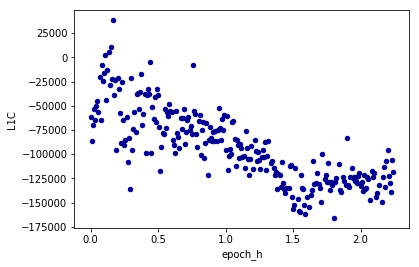

In [11]:

d.plot.scatter(x='epoch_h',y='L1C',c='DarkBlue')
#d.plot.scatter(x='epoch_h',y='L2C',c='DarkBlue')
#d.plot.scatter(x='epoch_h',y='Islc2',c='DarkBlue')

In [12]:
a = -82.51387166*  (np.cos  (np.arcsin(  (6400*np.cos(26.24*3.14/180))  /  (6400+350) )  )     ) #
a

-43.39507180764498

In [13]:
x = 937429.6846
y = 4619604.6444
ele = 20
azi = 80
f = (3.14/2)-ele - np.arcsin(6400/(6400+350)*np.cos(ele))
bp = np.arcsin( sin(x)*cos(f)+cos(x)*sin(f)*cos(azi)    )
pp = y+np.arcsin(sin(f)*sin(azi)*np.sec(bp))

AttributeError: module 'numpy' has no attribute 'sec'

In [33]:

to_lon = 0.4188 #mean
to_lat = 0.64577 # mean 
frm_lon =0.523598
frm_lat=0.7333

latarc = frm_lat - to_lat
lonarc = frm_lon - to_lon
print(latarc,lonarc )
lath   = np.sin(latarc*0.5e0)
print(lath)
lath  *= lath
print(lath)
lonh   = np.sin(lonarc*0.5e0)
lonh  *= lonh
tmp    = np.cos(frm_lat) * np.cos(to_lat)
res = 6372797.560856e0 * 2e0 * (np.arcsin(sqrt(lath + tmp*lonh)))

abs(res/1e3)
4/1e3
2.15e0
upper_limit_epsilon=1e-10
upper_limit_epsilon/2e0
5/1e3


0.08753 0.104798
0.04375103027181032
0.001914152649844863


0.005